In [1]:
#imports
import pandas as PD
from matplotlib import pyplot as MPL
import numpy as NP

In [2]:
#Read in CSV
file=PD.read_csv("https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv")

In [3]:
#Checking size
file.tail()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
212326,84X717,Icahn Charter School,K-8,Living Environment,2016,8,s,s,s,s,s,s,s,na,na
212327,84X717,Icahn Charter School,K-8,Living Environment,2016,5,s,s,s,s,s,s,s,na,na
212328,84X717,Icahn Charter School,K-8,Living Environment,2017,6,s,s,s,s,s,s,s,na,na
212329,84X717,Icahn Charter School,K-8,Living Environment,2017,4,s,s,s,s,s,s,s,na,na
212330,84X717,Icahn Charter School,K-8,U.S. History and Government,2015,1,s,s,s,s,s,s,s,na,na


In [4]:
#list of columns
list(file)

['School DBN',
 'School Name',
 'School Level',
 'Regents Exam',
 'Year',
 'Total Tested',
 'Mean Score',
 'Number Scoring Below 65',
 'Percent Scoring Below 65',
 'Number Scoring 65 or Above',
 'Percent Scoring 65 or Above',
 'Number Scoring 80 or Above',
 'Percent Scoring 80 or Above',
 'Number Scoring CR',
 'Percent Scoring CR']

In [5]:
#checking types of schools
file["School Level"].value_counts()

High school                        151160
Secondary School                    30252
Junior High-Intermediate-Middle     15742
K-12 all grades                      8294
K-8                                  6858
Elementary                             25
Name: School Level, dtype: int64

In [6]:
#limiting Schools to only High Schools and checking how many times each one appears
HighSchool = file.loc[file["School Level"].str.contains("High school")]
HighSchool["School Name"].value_counts()

New Visions Charter High School for Advanced Math     1337
New Visions Charter High School for the Humanities    1031
Francis Lewis High School                              490
James Madison High School                              490
Long Island City High School                           489
                                                      ... 
Legacy School for Integrated Studies                    51
Gotham Professional Arts Academy                        49
Manhattan International High School                     48
International Arts Business School                      30
South Bronx Community Charter School                    19
Name: School Name, Length: 457, dtype: int64

In [7]:
#After searching through schools I have chosen the one bellow
SchoolPicked = "Green School: An Academy for Environmental Careers"
#I want to compare them based the column bellow
ValuePicked = "Number Scoring 65 or Above"

In [8]:
#Datacleaning removimg junk data
#Since I only comparing them on one column I only really need to remove junk from that one
HighSchool = HighSchool[HighSchool[ValuePicked] != "s"]
HighSchool

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
20,01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2015,12,52.3,11,91.7,1,8.3,0,0,0,0
21,01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2016,50,63.9,25,50,25,50,3,6,15,30
22,01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2017,53,67.5,15,28.3,38,71.7,6,11.3,29,54.7
23,01M292,Orchard Collegiate Academy,High school,Common Core Algebra2,2016,6,48,6,100,0,0,0,0,0,0
25,01M292,Orchard Collegiate Academy,High school,Common Core English,2015,34,61.5,15,44.1,19,55.9,9,26.5,11,32.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212088,84X553,New Visions Charter High School for the Humani...,High school,U.S. History and Government,2016,71,69.1,20,28.2,51,71.8,14,19.7,na,na
212089,84X553,New Visions Charter High School for the Humani...,High school,U.S. History and Government,2016,92,67.6,32,34.8,60,65.2,13,14.1,na,na
212093,84X553,New Visions Charter High School for the Humani...,High school,U.S. History and Government,2017,64,71.5,14,21.9,50,78.1,21,32.8,na,na
212094,84X553,New Visions Charter High School for the Humani...,High school,U.S. History and Government,2017,96,73.3,16,16.7,80,83.3,32,33.3,na,na


In [9]:
#The Dataframe bellow are the rows with my selected schools
SchoolPickedDF = HighSchool.loc[HighSchool["School Name"].str.contains(SchoolPicked)]
#The dataFrame bellow are the rows with all other schools
NotPickedSchoolDF = HighSchool.loc[~HighSchool["School Name"].str.contains(SchoolPicked)]

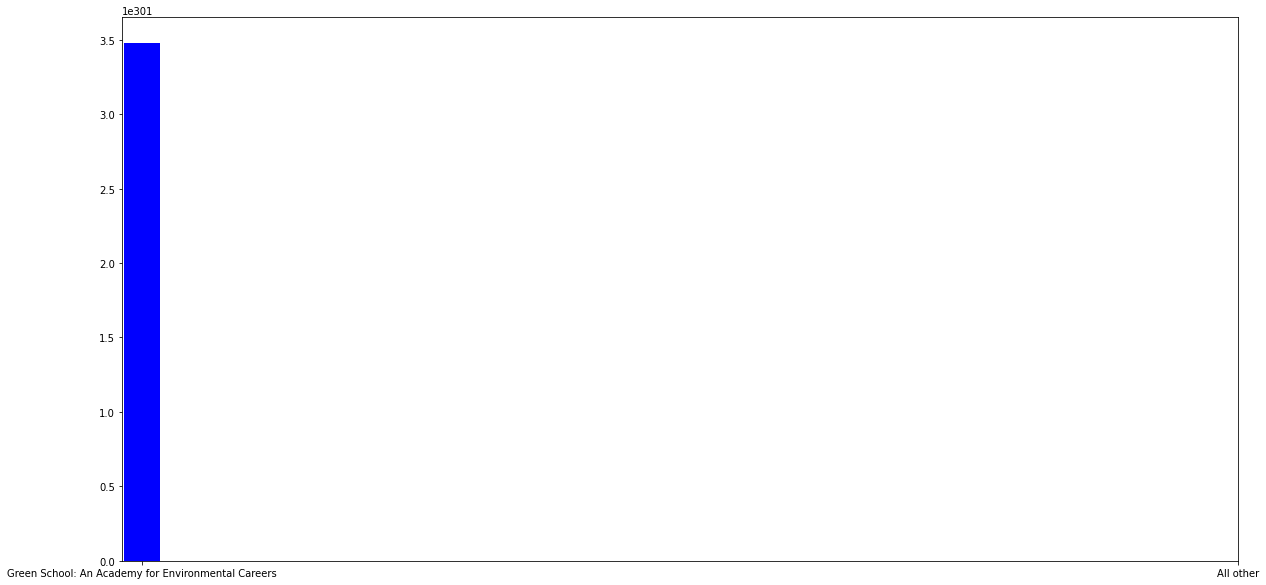

In [10]:
# For some reason the other the other schools bar is not showing
names = (SchoolPicked, "All other")
MPL.figure(figsize=(20,10))
MPL.bar([1,10],[SchoolPickedDF[ValuePicked].mean(),NotPickedSchoolDF[ValuePicked].mean()], align='center', width=0.3, color=["blue", "red"])
MPL.xticks([1,10],names)
MPL.show()

In [11]:
#This number looks very wrong and I have no idea why
SchoolPickedDF[ValuePicked].mean()

3.476864960327002e+301

In [12]:
#For some reason the mean of all other schools is infinity
NotPickedSchoolDF[ValuePicked].mean()

inf

In [13]:
#Trying to find the max value in case there is more junk data
#It crashed, says wrong argument, This was directly taken from online
HighSchool.loc[HighSchool[ValuePicked].idxmax()]

TypeError: reduction operation 'argmax' not allowed for this dtype